In [ ]:
pip install scikit-learn

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [14]:
import numpy as np
import csv
import pandas as pd
import matplotlib
import seaborn as sns


In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [16]:

d = pd.read_csv('D:/Jupyter-Notebook-Crash-Course/Datasets/HDS.csv')
d.head(5)
d.describe()
d.info()
print(d["HeartDisease"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
[0 1]


In [17]:
scaler = MinMaxScaler()
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
d[numeric_columns] = scaler.fit_transform(d[numeric_columns])

binary_columns = ['Gender', 'ExerciseAngina']
for column in binary_columns:
    d[column] = LabelEncoder().fit_transform(d[column])

nominal_columns = ['ChestPainType', 'RestingECG', 'ST_Slope']
nominal_encoder = OneHotEncoder(sparse_output=False,drop='first')
encoded_nominal = pd.DataFrame(
    nominal_encoder.fit_transform(d[nominal_columns]),
    columns=nominal_encoder.get_feature_names_out(nominal_columns)
)

d = pd.concat([d.drop(columns=nominal_columns), encoded_nominal], axis=1)

d.to_csv('HDS_pp.csv', index=False)


In [18]:
predictors = d.drop(['HeartDisease'], axis=1)
target = d["HeartDisease"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print(X_train.shape)
X_test.shape
Y_test.shape


(734, 15)


(184,)

Correlation 

In [19]:
print(d.corr()["HeartDisease"].abs().sort_values(ascending=False))

HeartDisease         1.000000
ST_Slope_Up          0.622164
ST_Slope_Flat        0.554134
ExerciseAngina       0.494282
Oldpeak              0.403951
ChestPainType_ATA    0.401924
MaxHR                0.400421
Gender               0.305445
Age                  0.282039
FastingBS            0.267291
Cholesterol          0.232741
ChestPainType_NAP    0.212964
RestingBP            0.107589
RestingECG_ST        0.102527
RestingECG_Normal    0.091580
ChestPainType_TA     0.054790
Name: HeartDisease, dtype: float64


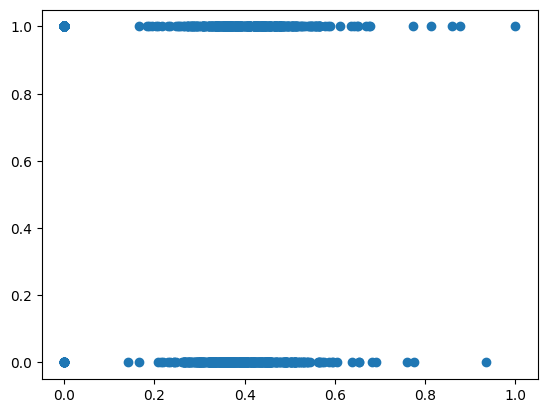

In [20]:
predictors['Cholesterol'].corr(target)
plt.scatter(predictors['Cholesterol'],target)

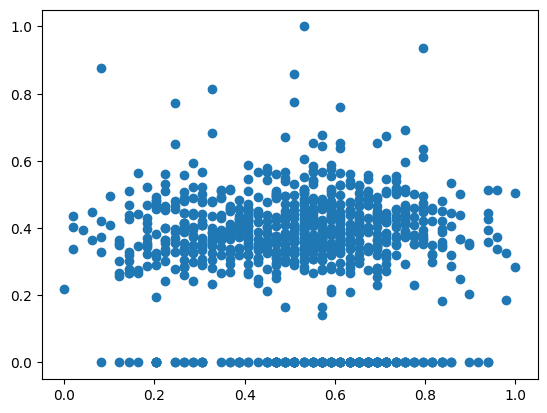

In [21]:
plt.scatter(predictors['Age'],predictors['Cholesterol'])

Analyze the performance of kNN with respect to accuracy, recall, precision, FPR, and ROC metrics
obtained for heart dataset.

In [22]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


The accuracy is82.06521739130434%
Confusion Matrix
 [[55 22]
 [11 96]]
              precision    recall  f1-score   support

     class 0       0.83      0.71      0.77        77
     class 1       0.81      0.90      0.85       107

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



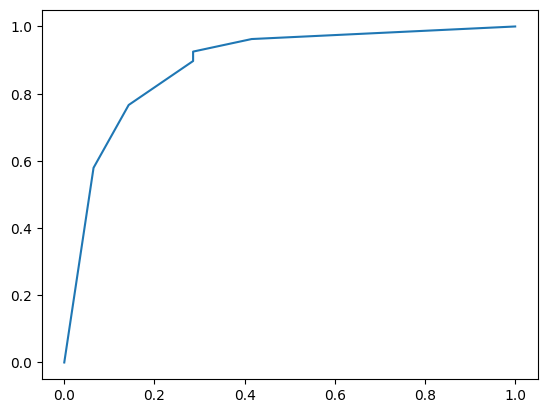

In [23]:
# Train a KNN classifier with 5 neighborss
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1).fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
print("The accuracy is"+str(metrics.accuracy_score(Y_test,Y_pred)*100)+"%")
print("Confusion Matrix\n",confusion_matrix(Y_test, Y_pred))

target_names = ['class 0', 'class 1']
print(classification_report(Y_test, Y_pred,
target_names=target_names))

fpr, tpr, _ = metrics.roc_curve(Y_test, knn.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {metrics.auc(fpr, tpr):.2f})')

For k = 3, accuracy is 84.24%
For k = 6, accuracy is 83.15%
For k = 8, accuracy is 83.15%
For k = 9, accuracy is 82.07%


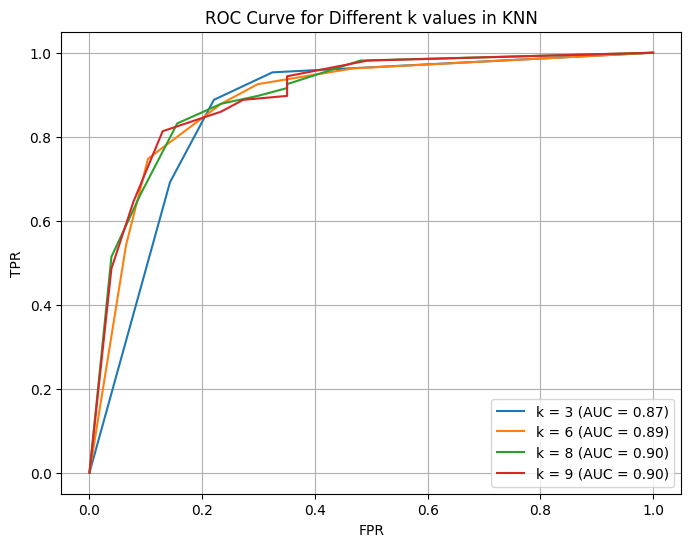

In [27]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_values = [3, 6, 8, 9]
plt.figure(figsize=(8, 6)) 

for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1).fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy = metrics.accuracy_score(Y_test, Y_pred) * 100
    print(f"For k = {i}, accuracy is {accuracy:.2f}%")
    
    fpr, tpr, _ = metrics.roc_curve(Y_test, knn.predict_proba(X_test)[:, 1])
    
    plt.plot(fpr, tpr, label=f'k = {i} (AUC = {metrics.auc(fpr, tpr):.2f})')

plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve for Different k values in KNN")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Larger k values,can lead to underfitting if set too high
k = 3 appears to be the optimal choice for this dataset, providing the highest accuracy.



There's a risk of a tie where the nearest neighbors are evenly split between the two classes,it may need additional tie-breaking techniques to cater this.